# Introducción a scikit-learn (2) - Crea un modelo para predecir el consumo de combustible

Se pide crear un modelo de regresión lineal para predecir el consumo de combustible (litros por 100 kilómetros) de un vehículo basado en el peso del vehículo y la cilindrada del motor.

### 1. Generación el conjunto de datos

Vamos a crear un conjunto de datos sintético para 1000 coches que represente la relación entre el peso de un coche, su cilindrada y consumo de combustible. Para ello tendremos en cuenta lo siguiente:

1. Variables
  * $Peso (kg.)$: Peso del vehículo.
  * $Cilindrada (cc.)$: Volumen total de los cilindros del motor del vehículo.
  * $Consumo (L/100km)$: Litros de combustible que el vehículo consume para recorrer 100 kilómetros.

2. Suponiendo que:
  * El consumo de combustible aumenta con el peso y la cilindrada del motor, pero a diferentes tasas.

3. Generación de datos:
  * Generar pesos: media = 1500 kg, desviación estándar = 300 kg
  * Generar cilindradas: media = 1800 cc, desviación estándar = 400 cc
  * Generar consumo de combustible: base 6 L/100km + 0.005 L/kg + 0.002 L/cc + ruido (entre 0 y 0.5).

---

Podemos generar los pesos y las cilindradas con `np.random.normal` mientras que el consumo sigue una fórmula:

* Tenemos la base de $6 \frac{L}{100km}$.
* Tenemos el coeficiente del peso de $0.005 \frac{L}{Peso}$.
* Tenemos el coeficiente de la cilíndrada de $0.002 \frac{L}{Cilíndrada}$.
* También hay que redondear los valores generados para la cilíndrada ya que son enteros. $Redondeo(\frac{ValorGenerado}{100}) \times 100$
* Por último, el ruido. Usaremos `np.random.uniform` para distribuir los datos uniformemente.

La fórmula resultante es:

$
Consumo = 6 + 0.005 \times Peso + 0.002 \times Cilíndrada + Ruido(0, 0.5, 1000)
$

In [ ]:
# Importamos las librerías para generar los datos
import numpy as np
import pandas as pd

DATA_SIZE = 1000

BASE = 6
SEMILLA = 25

W_MEAN, W_STD = 1500, 300
C_MEAN, C_STD = 1800, 400

np.random.seed(SEMILLA)

# Generamos los datos

weight = np.random.normal(W_MEAN, W_STD, DATA_SIZE)
cylindrical = np.round(np.random.normal(C_MEAN, C_STD, DATA_SIZE) / 100)*100

consumption = BASE + 0.005 * weight + 0.002 * cylindrical + np.random.uniform(0, 0.5, DATA_SIZE)

data = pd.DataFrame({'peso': weight, 'cilindrada': cylindrical, 'consumo': consumption})
data

,peso,cilindrada,consumo
0,1568.481927,1600.0,17.435562
1,1808.067091,1500.0,18.509396
2,1248.124545,1500.0,15.298158
3,1322.645545,3200.0,19.443333
4,1212.933511,1300.0,14.942924
...,...,...,...
995,1760.801592,2100.0,19.070409
996,1551.200217,1500.0,16.768293
997,1679.418479,2300.0,19.408473
998,1865.178661,2000.0,19.429313


### 2. Visualización de los datos

Para visualizar los datos con tres variables podemos hacer una gráfica 3D que tenga en cuenta la relación de las tres variables. Podemos usar `add_subplot` para ello.



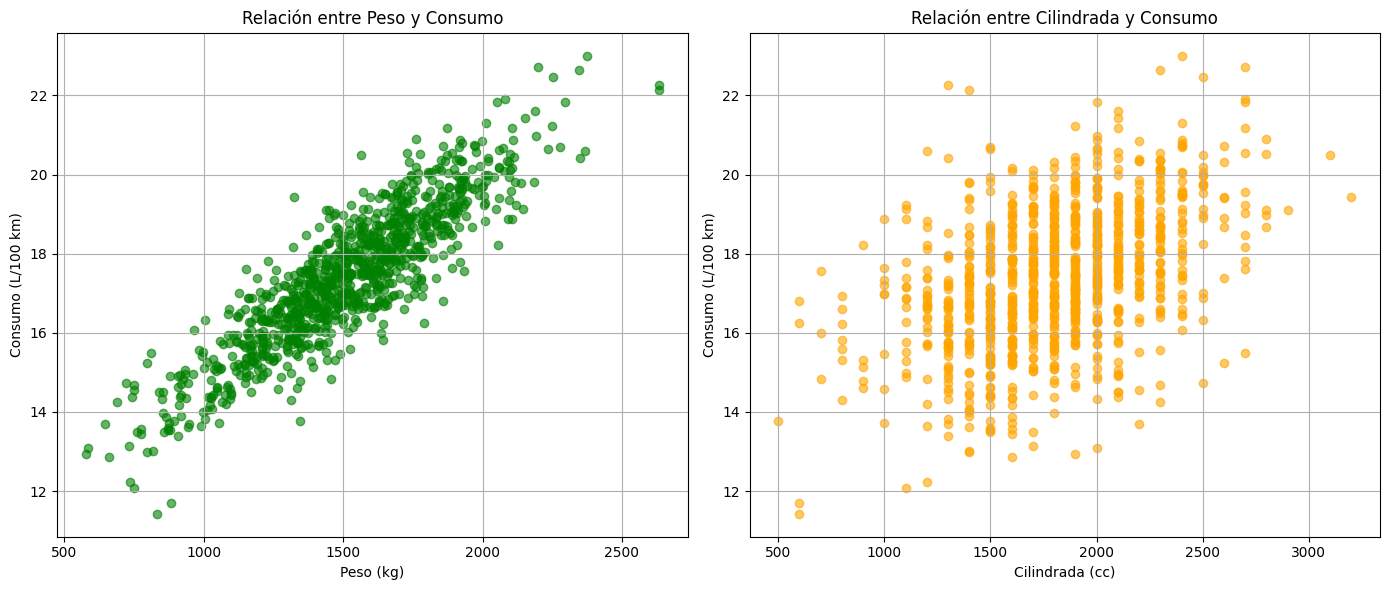

In [ ]:
# Importamos matplotlib
import matplotlib.pyplot as plt

# Crear gráficos de dispersión para visualizar la relación entre consumo y cada característica
plt.figure(figsize=(14, 6))

# Relación entre consumo y peso
plt.subplot(1, 2, 1)
plt.scatter(data['peso'], data['consumo'], alpha=0.6, color='green')
plt.title('Relación entre Peso y Consumo')
plt.xlabel('Peso (kg)')
plt.ylabel('Consumo (L/100 km)')
plt.grid(True)
plt.tight_layout()

# Relación entre consumo y cilindrada
plt.subplot(1, 2, 2)
plt.scatter(data['cilindrada'], data['consumo'], alpha=0.6, color='orange')
plt.title('Relación entre Cilindrada y Consumo')
plt.xlabel('Cilindrada (cc)')
plt.ylabel('Consumo (L/100 km)')
plt.grid(True)
plt.tight_layout()

plt.show()

### 3. Datos de entrenamiento y test

Una vez hemos visualizado los datos del consumo por cada característica, crearemos la matriz de características X y el objetivo y para generar los datos de entrenamiento y test de nuestro modelo.

In [ ]:
# Importamos train_test_split
from sklearn.model_selection import train_test_split

X = data[['peso', 'cilindrada']]
y = data['consumo']

# Dividir los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

### 4. Creación del modelo

Una vez tenemos la matriz de características X y el objetivo y, es momento de entrenar nuestro modelo. Nuestro modelo será `LinearRegression`.

In [ ]:
# Importamos LinearRegression y creamos el modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

LinearRegression()

### 5. Testeando el modelo

Una vez hemos entrenado nuestro modelo, es hora de probar que tan preciso es y el margen de error que presenta. Usaremos distinas métricas para evaluar el modelo entrenado.

In [ ]:
# Importamos las pruebas de sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {round(mse, 2)}")
print(f"Coeficiente de determinación (R^2): {round(r2, 2)}")
print(f"Error absoluto medio (MAE): {round(mae, 2)}")

Error cuadrático medio (MSE): 0.02
Coeficiente de determinación (R^2): 0.99
Error absoluto medio (MAE): 0.13


El desempeño de nuestro modelo es de casi el 100%, y el error mínimo. ES un buen modelo.

#### Opcional: Gráfica comparativa entre el modelo y los datos reales

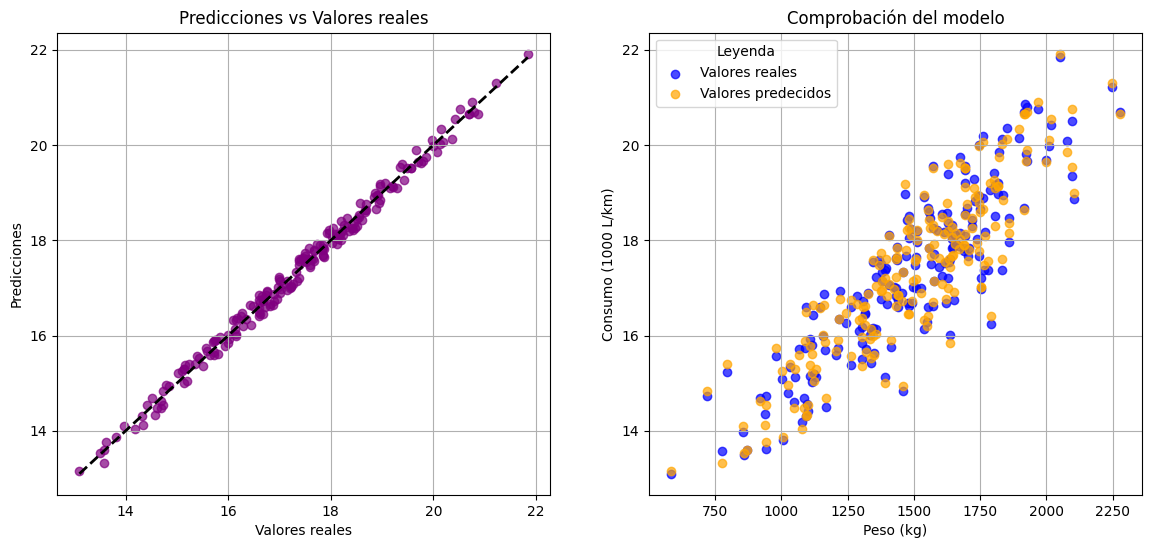

In [ ]:
plt.figure(figsize=(14, 6))
COLORS = ['blue', 'orange']
LABELS = ['Valores reales', 'Valores predecidos']
Y_TYPES = [y_test, y_pred]

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')

plt.subplot(1, 2, 2)

for i, label in enumerate(LABELS):
    plt.scatter(X_test['peso'], Y_TYPES[i], label=label, c=COLORS[i], alpha=0.7)

plt.xlabel('Peso (kg)')
plt.ylabel('Consumo (1000 L/km)')
plt.title('Comprobación del modelo')
plt.legend(title='Leyenda', fontsize=10)
plt.grid(True)

plt.show()